https://www.kaggle.com/bextuychiev/advanced-time-series-analysis-decomposition/

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams["figure.figsize"] = [20, 18]
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")

In [3]:
goods = pd.read_csv('data_t10.csv',parse_dates=["date"])
goods.head()

,product,date,city,sales
0,Mixers,2014-04-01,Mumbai,2679347
1,Mixers,2014-05-01,Mumbai,3864612
2,Mixers,2014-06-01,Mumbai,2932658
3,Mixers,2014-07-01,Mumbai,3703713
4,Mixers,2014-08-01,Mumbai,3931029


In [7]:
goods_pivot = goods.pivot_table(index = ['date','product','city'], 
                                values = 'city').reset_index()
goods_pivot = goods_pivot.set_index('date')
goods_pivot.head(10)

,product,city,sales
date,,,
2014-04-01,Dry Iron,Ahmd,194200
2014-04-01,Dry Iron,Bangalore,521820
2014-04-01,Dry Iron,Chennai,190128
2014-04-01,Dry Iron,Cochin,240875
2014-04-01,Dry Iron,Delhi,66895
2014-04-01,Dry Iron,Hyderabad,316671
2014-04-01,Dry Iron,Kolkata,333375
2014-04-01,Dry Iron,Mumbai,719991
2014-04-01,Dry Iron,Patna,47542


In [13]:
goods_pivot[['product','sales']].groupby('product').mean()

,sales
product,
Dry Iron,5.730218e+05
FoodProcessor,4.336168e+05
Gas Stove,3.446395e+05
Induction cookers,6.100091e+05
Mixers,2.203787e+06
Oven Toaster Grill,3.002696e+05
SECF,2.841554e+05
Steam Iron,3.986946e+05
Water Heaters,9.135193e+05


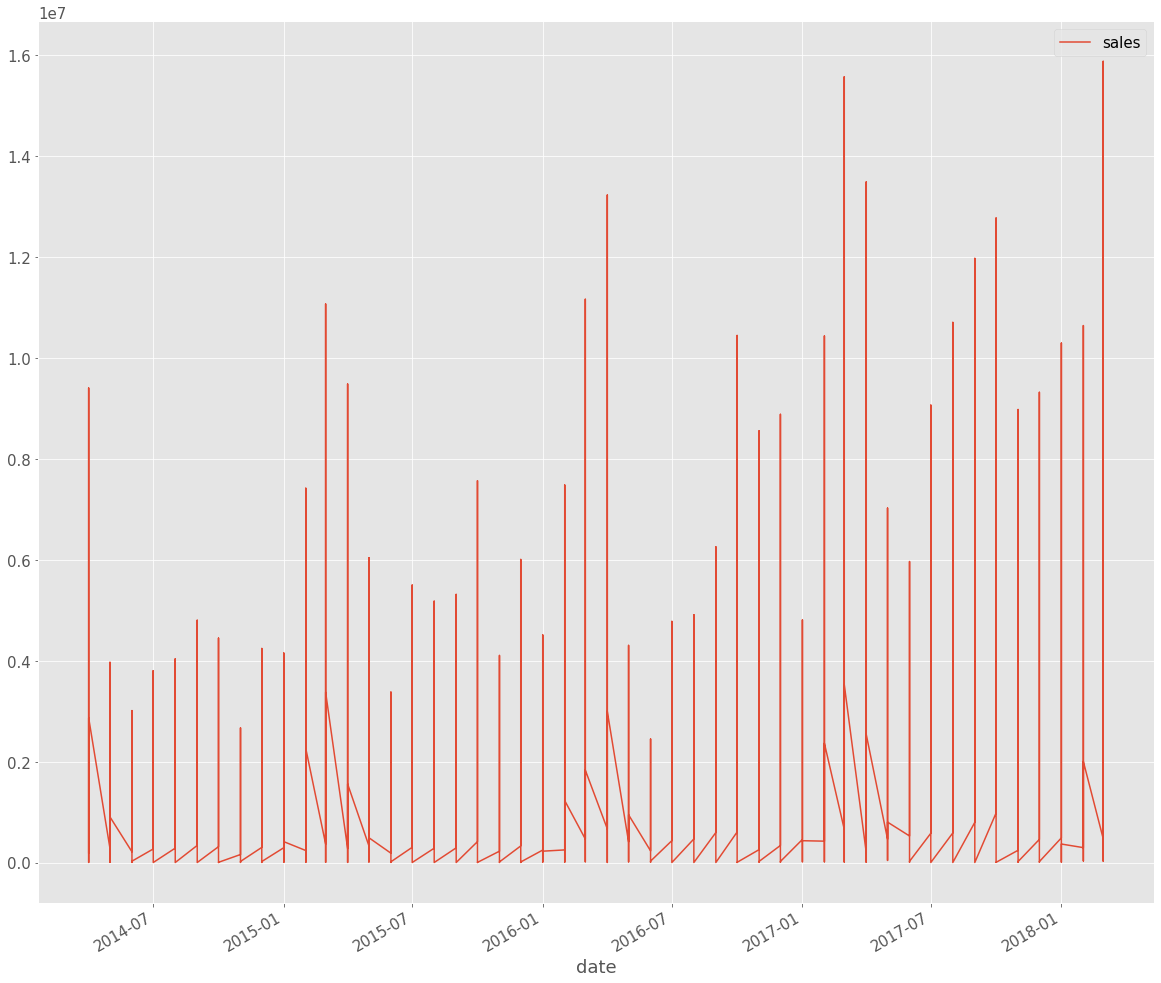

In [8]:
goods_pivot

# Seasonality Analysis

In [16]:
goods = pd.read_csv('new_sales_data.csv',parse_dates=["date"], index_col="date")

goods.head()

,coolers,Dry Iron,FoodProcessor,Gas Stove,Induction cookers,Mixers,Oven Toaster Grill,SECF,Steam Iron,Water Heaters
date,,,,,,,,,,
2014-04-01,35461588,2923874,4521490,1481189,3955124,12630533,1624839,812141,3374557,88920
2014-05-01,11186428,4217311,6521665,2136426,5704757,18217913,2343619,1171409,4867363,1033708
2014-06-01,325114,3200302,4948960,1621226,4329052,13824653,1778455,888923,3693597,3391997
2014-07-01,0,4041729,6250141,2047479,5467247,17459431,2246046,1122641,4664717,6622215
2014-08-01,0,4289790,6633744,2173141,5802799,18531008,2383898,1191540,4951013,5494659


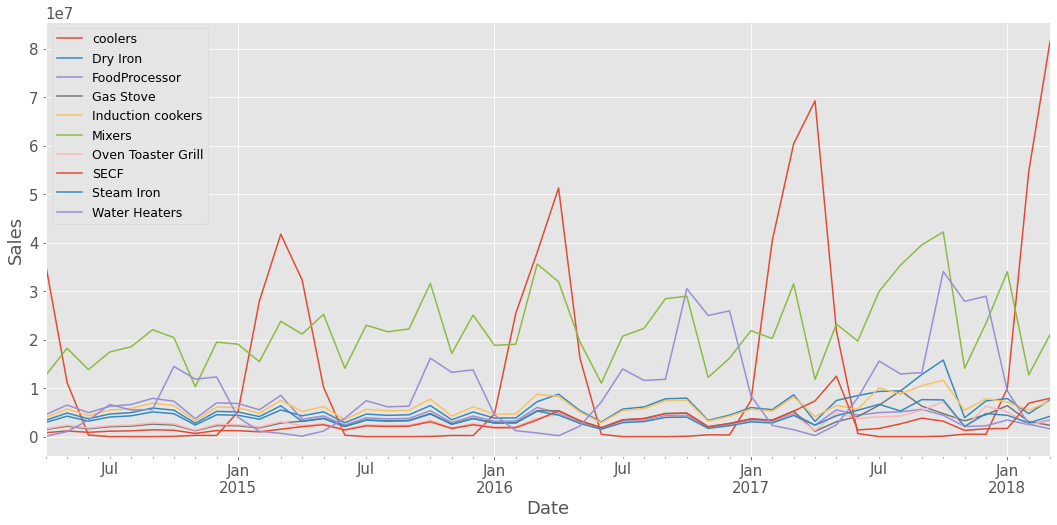

In [23]:
goods.plot(figsize=(18, 8))
plt.legend(fontsize="small")
plt.xlabel("Date")
plt.ylabel("Sales");

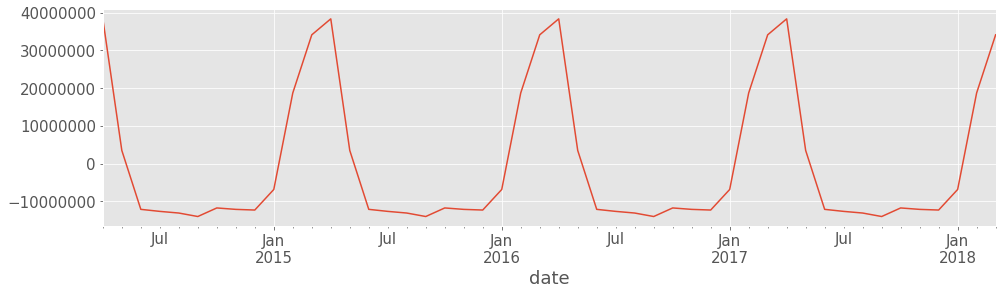

In [25]:
import statsmodels.api as sm
from matplotlib import rcParams
plt.ticklabel_format(style='plain')
decomposition = sm.tsa.seasonal_decompose(goods["coolers"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

* This plot shows that production really goes down at the 2nd half of each year, but it reaches to peak in Jan to Jul period somewhere around March-April

In [26]:
goods.columns

Index(['coolers', 'Dry Iron', 'FoodProcessor', 'Gas Stove',
       'Induction cookers', 'Mixers', 'Oven Toaster Grill', 'SECF',
       'Steam Iron', 'Water Heaters'],
      dtype='object')

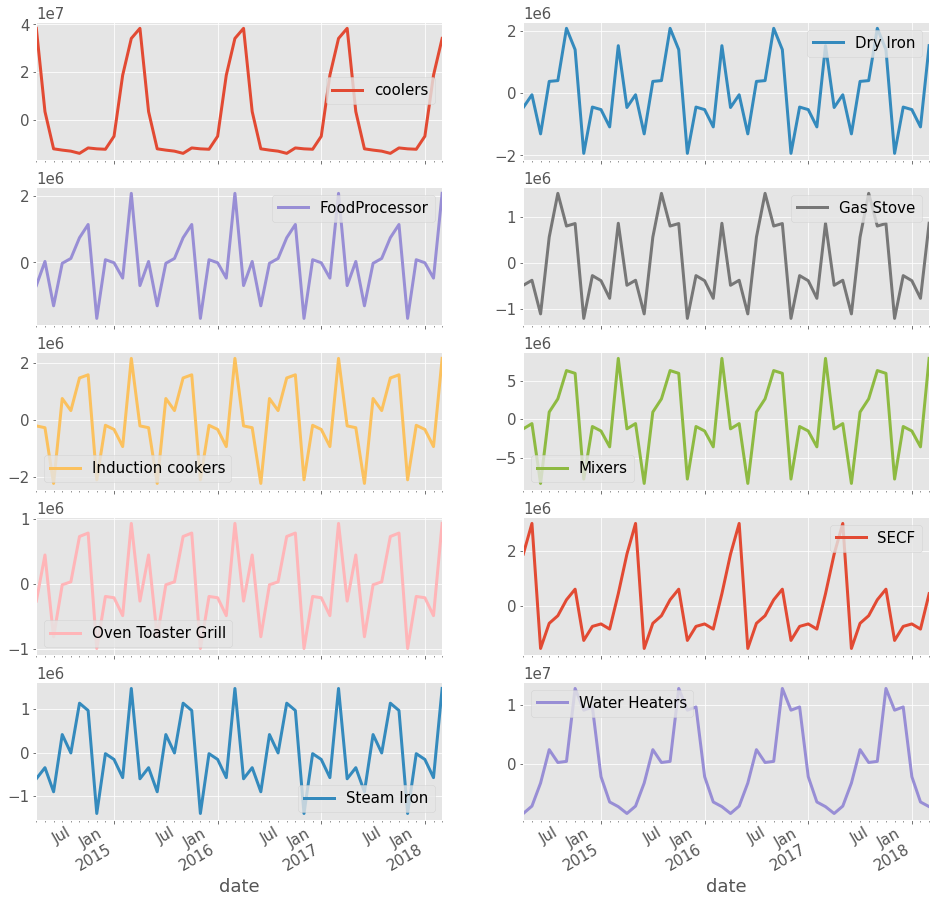

In [59]:
# Init empty dict to store decompose results
seasonality_dict = {}
for ts in goods.columns:
    decompositions = sm.tsa.seasonal_decompose(goods[ts].dropna())
   
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
plt.rcParams["figure.figsize"] = 16, 50
pd.DataFrame(seasonality_dict).plot(subplots = True, layout=(15, 2), linewidth=3)
plt.ticklabel_format(useOffset=False, style='plain');

# Trend Analysis

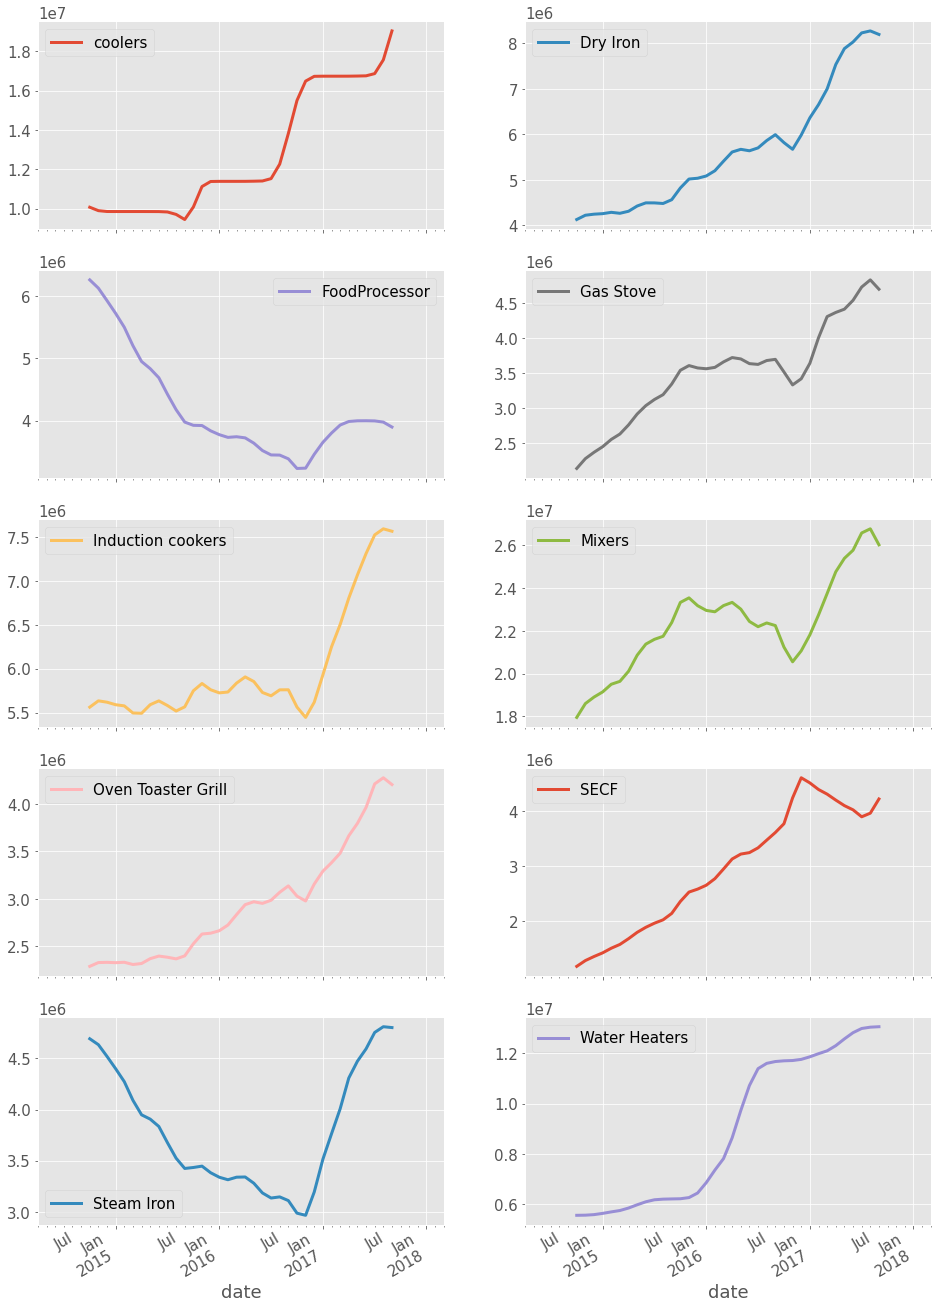

In [61]:
trend_dict = {}

for ts in goods.columns:
    decomposition = sm.tsa.seasonal_decompose(goods[ts].dropna())
    
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(10, 2), linewidth=3);

* Food processor's sales has dropped since 2015 drastically, Iron dropped but picked up since 2017 - check the hypothesis why?

# Noise

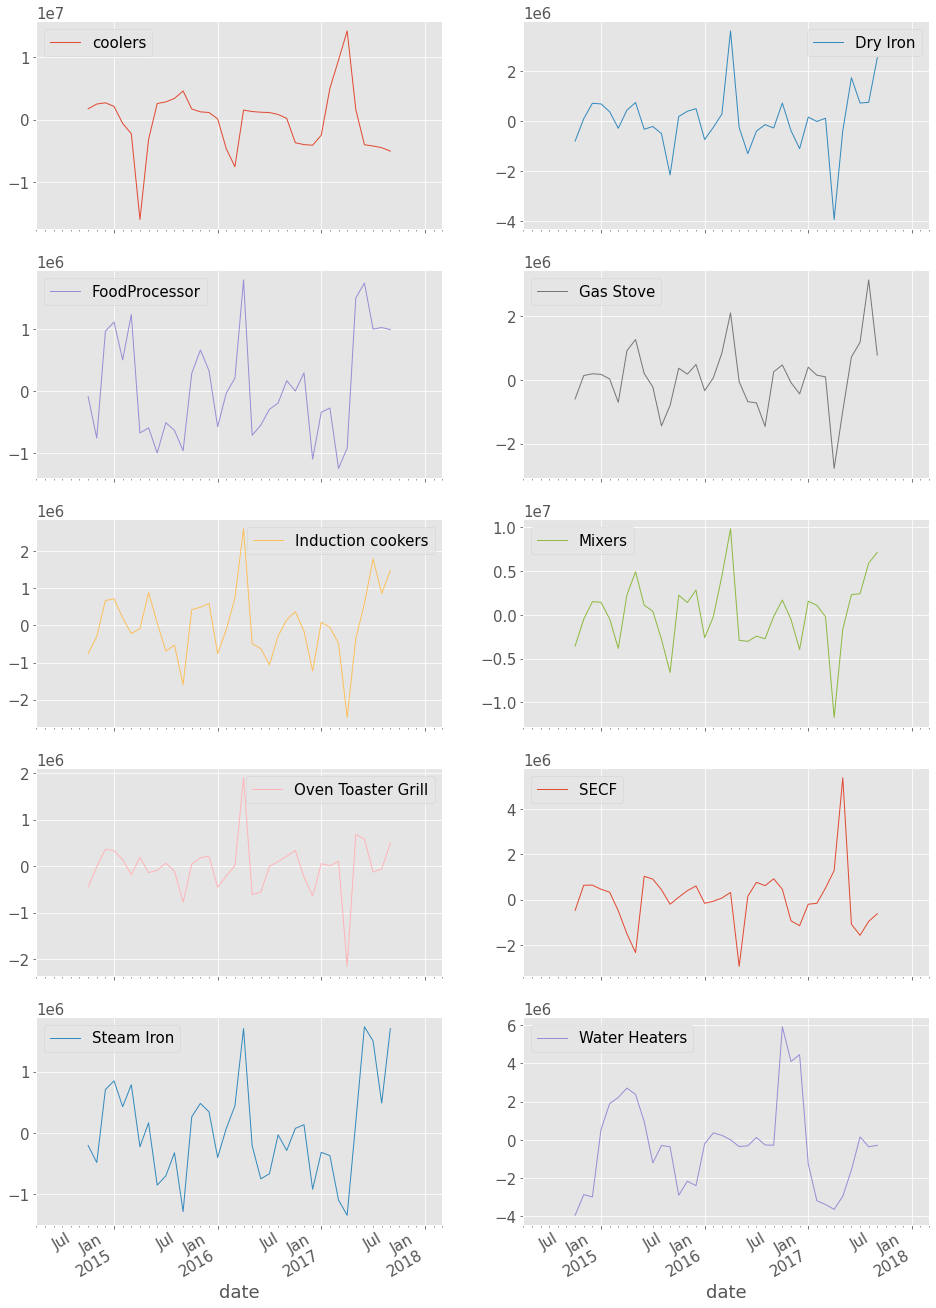

In [63]:
resid_dict = {}

for ts in goods.columns:
    decomposition = sm.tsa.seasonal_decompose(goods[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(subplots=True, layout=(10, 2), linewidth=1);

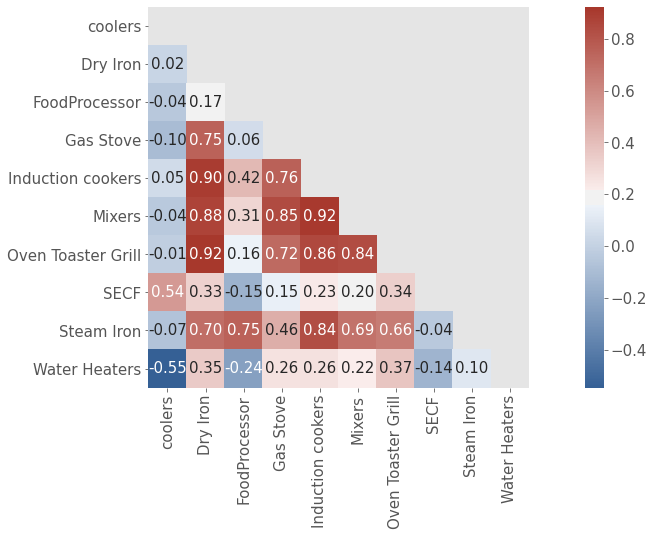

In [67]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = goods.corr(method="pearson")

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

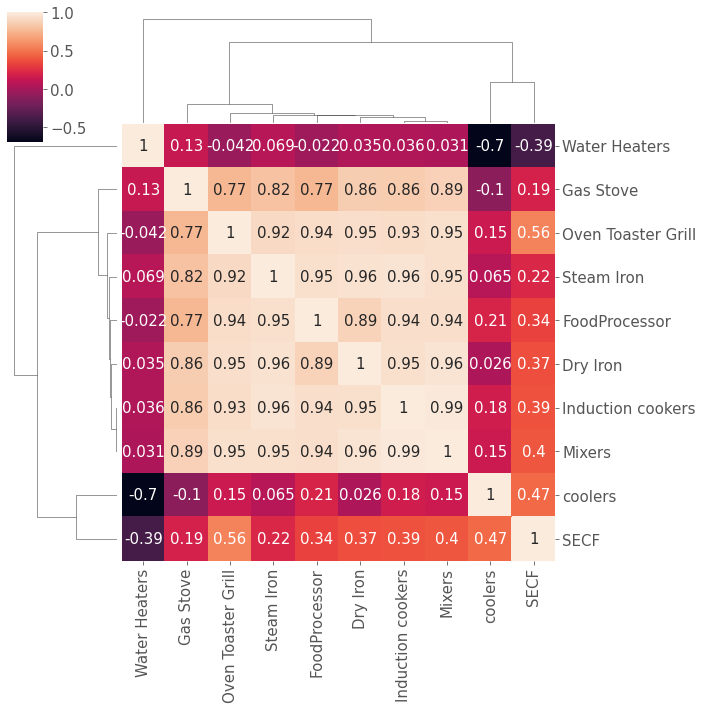

In [69]:
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(goods[ts].dropna()).seasonal for ts in goods.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

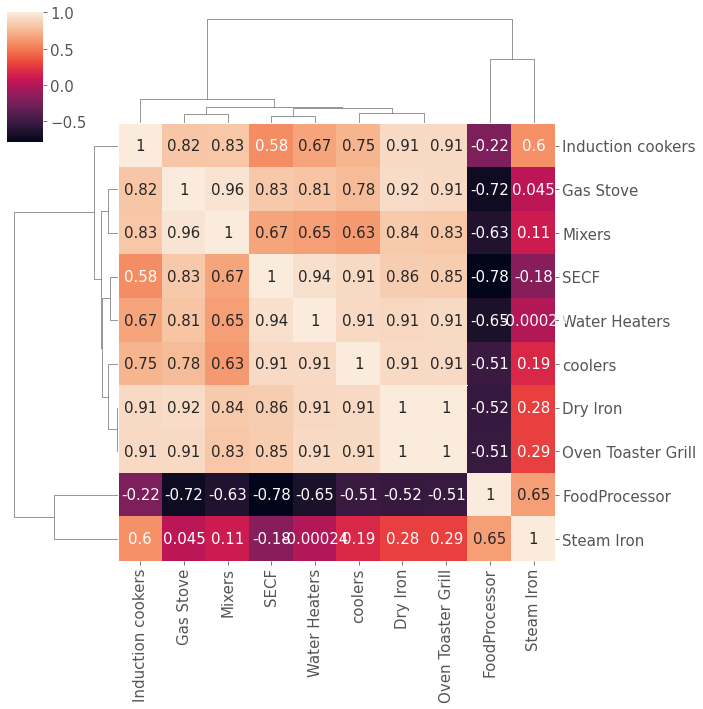

In [70]:
trend_dict = {
    ts: sm.tsa.seasonal_decompose(goods[ts].dropna()).trend for ts in goods.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True)
plt.show();

# Autocorrelation

In [71]:
goods.head()

,coolers,Dry Iron,FoodProcessor,Gas Stove,Induction cookers,Mixers,Oven Toaster Grill,SECF,Steam Iron,Water Heaters
date,,,,,,,,,,
2014-04-01,35461588,2923874,4521490,1481189,3955124,12630533,1624839,812141,3374557,88920
2014-05-01,11186428,4217311,6521665,2136426,5704757,18217913,2343619,1171409,4867363,1033708
2014-06-01,325114,3200302,4948960,1621226,4329052,13824653,1778455,888923,3693597,3391997
2014-07-01,0,4041729,6250141,2047479,5467247,17459431,2246046,1122641,4664717,6622215
2014-08-01,0,4289790,6633744,2173141,5802799,18531008,2383898,1191540,4951013,5494659


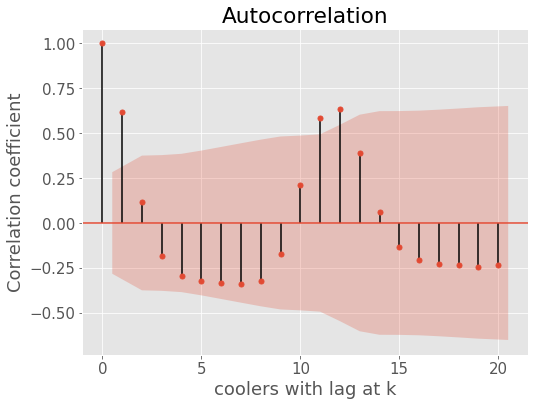

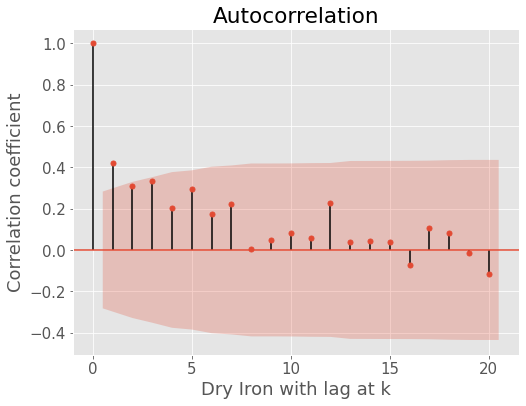

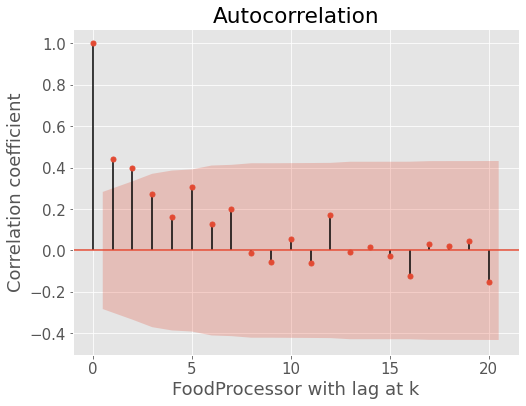

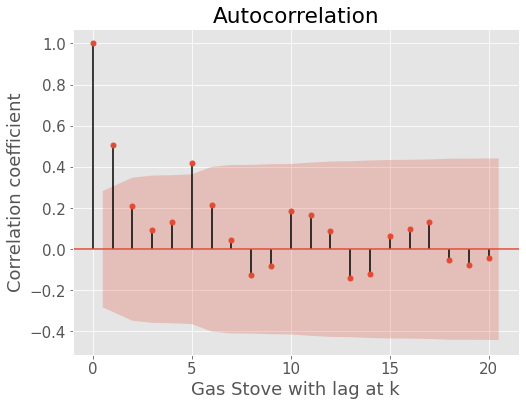

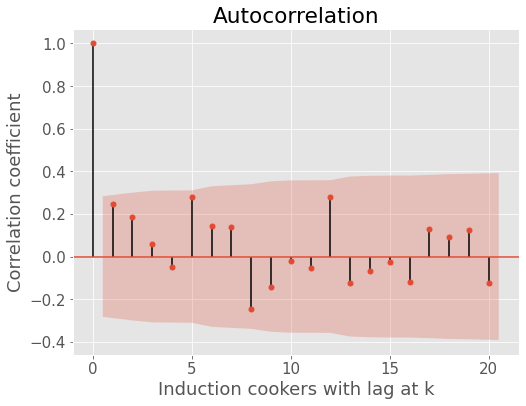

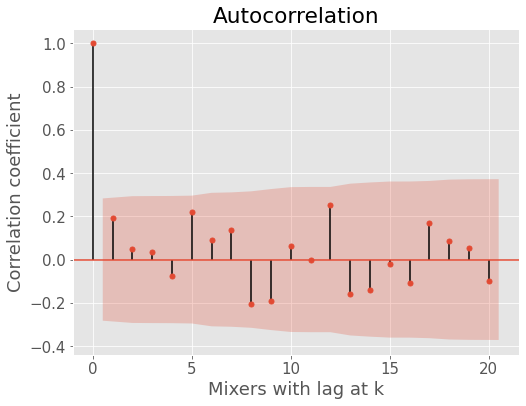

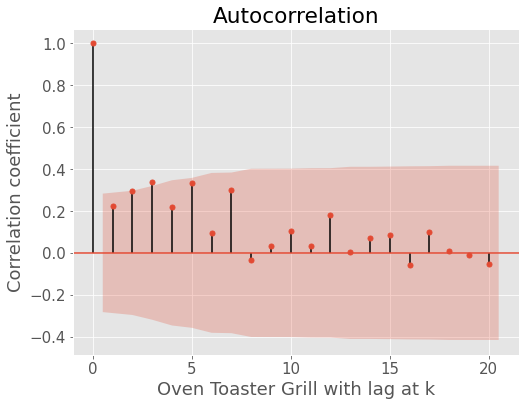

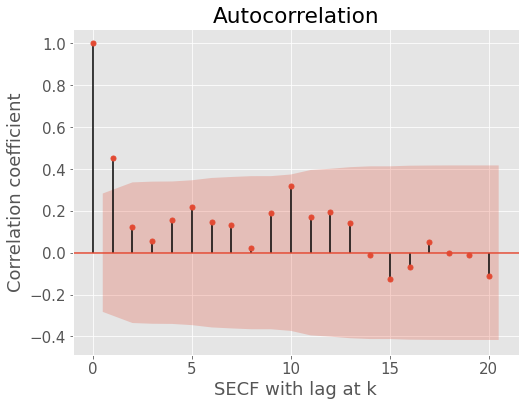

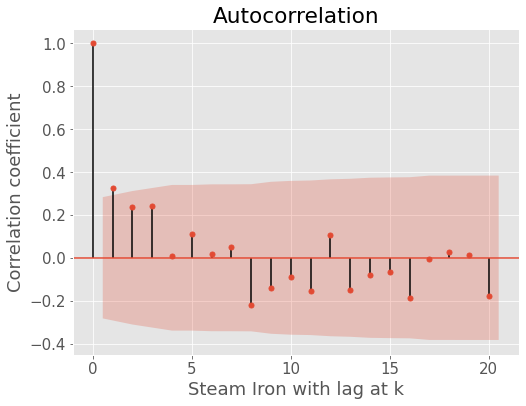

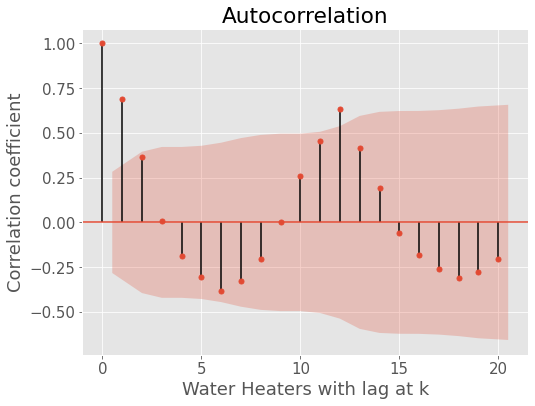

In [84]:
resid_dict = {}

for ts in goods.columns:
    rcParams["figure.figsize"] = 8, 6

    # Stands for Time Series Analysis Plots (TSA Plots)
    fig = tsaplots.plot_acf(goods[ts], lags=20)
    
    plt.xlabel(ts + " with lag at k")
    plt.ylabel("Correlation coefficient")
    plt.show()

When a clear trend exists in a time series, the autocorrelation tends to be high at small lags like 1 or 2. When seasonality exists, the autocorrelation goes up periodically at larger lags

# Partial autocorrelation

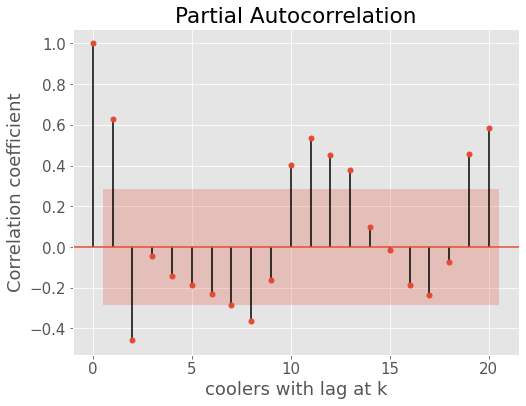

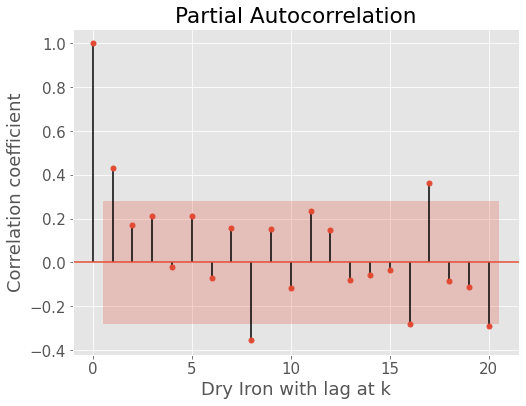

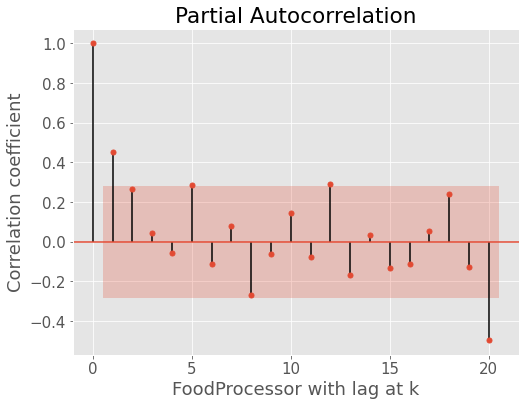

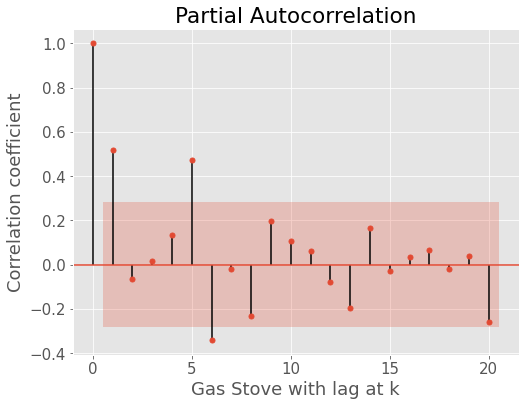

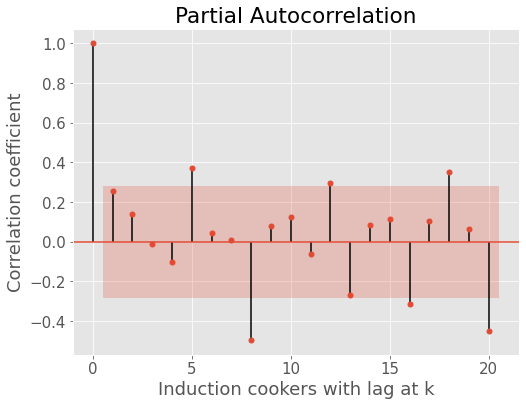

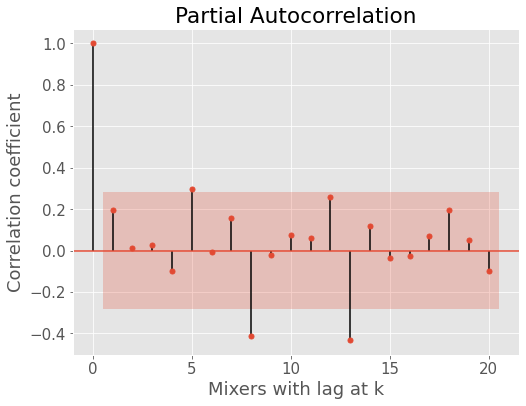

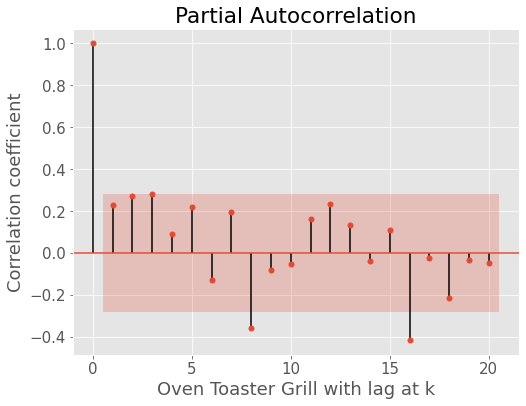

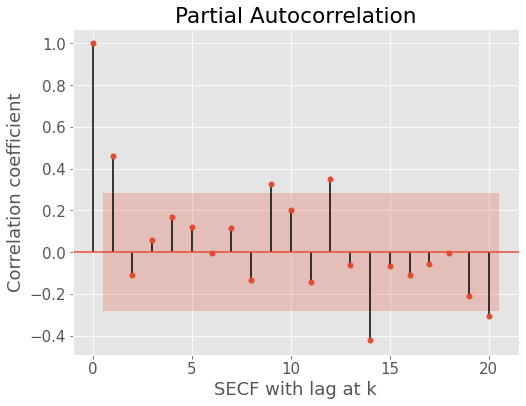

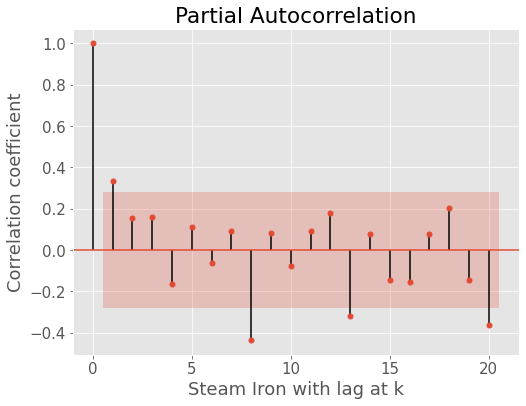

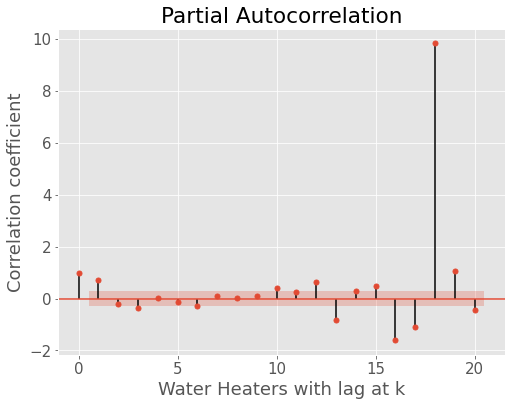

In [85]:
for ts in goods.columns:
    rcParams["figure.figsize"] = 8, 6

    # Stands for Time Series Analysis Plots (TSA Plots)
    fig = tsaplots.plot_pacf(goods[ts], lags=20)
    
    plt.title("Partial Autocorrelation")
    plt.xlabel(ts + " with lag at k")
    plt.ylabel("Correlation coefficient")
    plt.show()